## Data Wrangling:

In [1]:
#import packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import random
from scipy import stats
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#import data
red = pd.read_csv('redTrain.csv', sep=';', index_col=0)
white = pd.read_csv('whiteTrain.csv',sep =';', index_col=0)
redTest = pd.read_csv('redTest.csv', sep=';', index_col=0)
whiteTest = pd.read_csv('whiteTest.csv',sep =';', index_col=0)

#check no null values
assert pd.notnull(white).all().all()
assert pd.notnull(red).all().all()

C:\Users\zackb\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#inspect white wine data
print('White:')
print('Info:')
print(white.info())
print('Columns:')
print(white.columns)

print()

# inspect red wine data
print('Red:')
print('Info:')
print(red.info())
print('Columns:')
print(red.columns)




White:
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 2061 to 1014
Data columns (total 12 columns):
fixed acidity           3673 non-null float64
volatile acidity        3673 non-null float64
citric acid             3673 non-null float64
residual sugar          3673 non-null float64
chlorides               3673 non-null float64
free sulfur dioxide     3673 non-null float64
total sulfur dioxide    3673 non-null float64
density                 3673 non-null float64
pH                      3673 non-null float64
sulphates               3673 non-null float64
alcohol                 3673 non-null float64
quality                 3673 non-null object
dtypes: float64(11), object(1)
memory usage: 373.0+ KB
None
Columns:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Red:
Info:
<class 'pandas.core

In [3]:
# check quality variable spread white
print('White')
white.groupby('quality').count()

White


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
excellent,795,795,795,795,795,795,795,795,795,795,795
good,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741
poor,137,137,137,137,137,137,137,137,137,137,137


In [4]:
# check quality variable spread red
print('Red')
red.groupby('quality').count()

Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
excellent,163,163,163,163,163,163,163,163,163,163,163
good,989,989,989,989,989,989,989,989,989,989,989
poor,47,47,47,47,47,47,47,47,47,47,47


In [5]:
# removing outliers that are more than 3 standard deviations
# loop through physiochemical variables of white to remove outliers
sum1 = 0
len1 = len(white.alcohol)
print('White outliers removed due to:')
for idx in white.columns[:11]:
    length = len(white[idx])
    p975, p25 = np.percentile(white[idx], [99.85 ,0.15])
    white = white.loc[white[idx]<= (p975)]
    white = white.loc[white[idx]>=p25]
    sum1 += length - len(white[idx])
    print(idx,':', length - len(white[idx]) )
print('Total White Outliers removed:',sum1, ',   Percent Deleted:', sum1/len1*100,'%' )


White outliers removed due to:
fixed acidity : 10
volatile acidity : 10
citric acid : 6
residual sugar : 7
chlorides : 12
free sulfur dioxide : 7
total sulfur dioxide : 11
density : 11
pH : 11
sulphates : 11
alcohol : 9
Total White Outliers removed: 105 ,   Percent Deleted: 2.858698611489246 %


In [6]:
# loop through physiochemical variables of red to remove outliers
sum1=0
len1 = len(red.alcohol)

print('Red outliers removed due to:')
for idx in red.columns[:11]:
    length = len(red[idx])
    p975, p25 = np.percentile(red[idx], [99.85 ,0.15])
    red = red.loc[red[idx]<= (p975)]
    red = red.loc[red[idx]>= (p25)]
    sum1 += length - len(red[idx])
    print(idx,':', length - len(red[idx]))
print('Total Red Outliers Removed:',sum1 , ',   Percent Deleted:', sum1/len1*100 , '%' )


Red outliers removed due to:
fixed acidity : 3
volatile acidity : 4
citric acid : 2
residual sugar : 3
chlorides : 4
free sulfur dioxide : 2
total sulfur dioxide : 2
density : 4
pH : 4
sulphates : 3
alcohol : 2
Total Red Outliers Removed: 33 ,   Percent Deleted: 2.7522935779816518 %


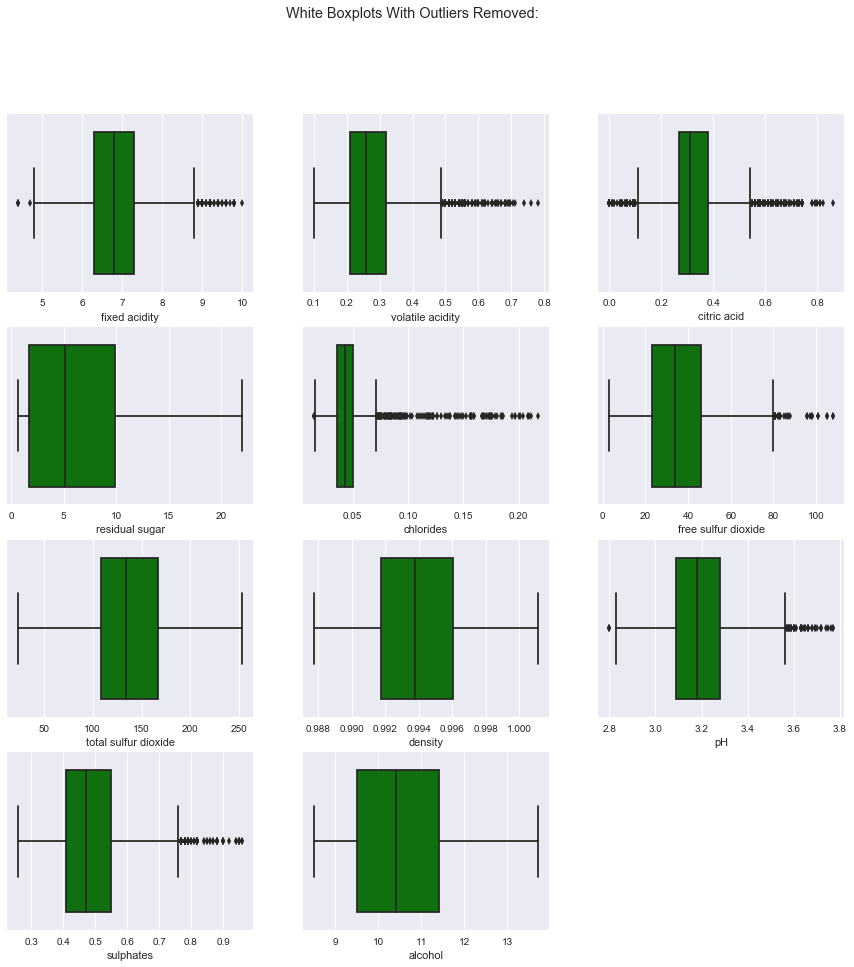

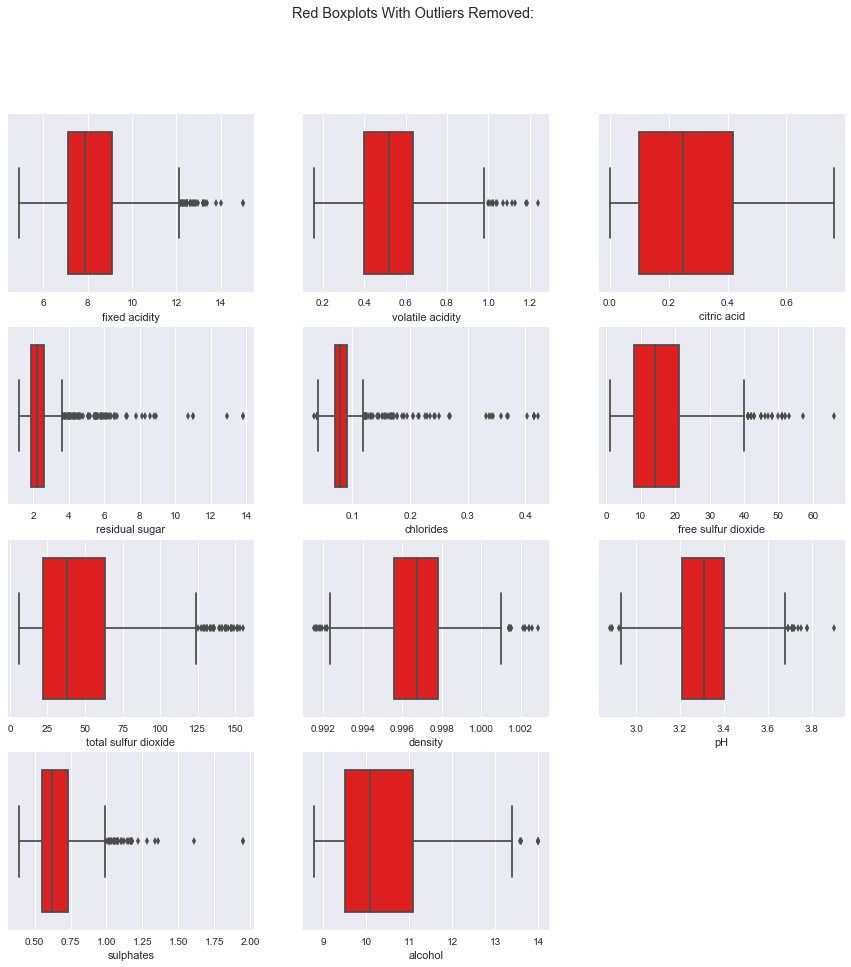

In [7]:
# check boxplots of observed physichemical variables for outliers
sns.set()

#increase  figure size
mpl.rcParams['figure.figsize'] = (15,15)

    
# loop through white variables to check
plt.suptitle('White Boxplots With Outliers Removed:')
for i, col in enumerate(white.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(white[col], color = 'green')
plt.show()

#loop through red variables to check
plt.suptitle('Red Boxplots With Outliers Removed:')
for i, col in enumerate(red.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(red[col], color = 'red')
plt.show()


## Data story:
    The first item of note is that in both data sets good wines are very common but there are very for poor and excellent wines.

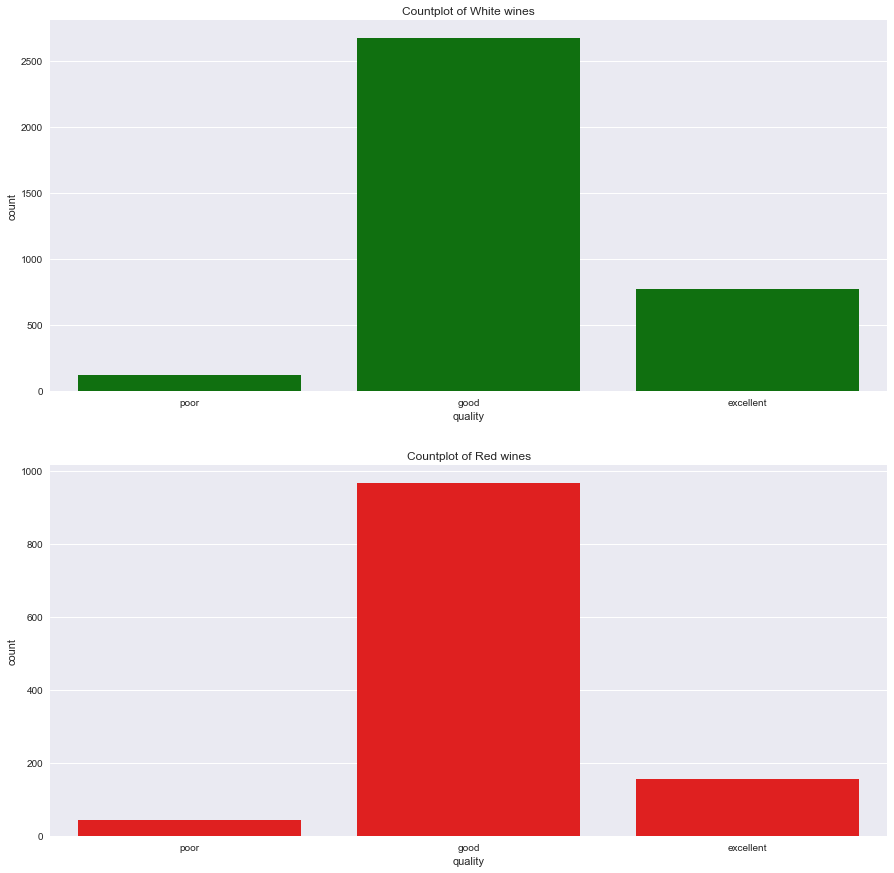

In [8]:
# show how there are a lot of good wines and very few poor or excellent

sns.set()
plt.subplot(2,1,1)
Countplot = sns.countplot(x='quality',data= white , color ='green', order = ['poor', 'good', 'excellent'])
Countplot  = plt.title('Countplot of White wines')
plt.subplot(2,1,2)
Countplot = sns.countplot(x= 'quality',data = red, color ='red', order = ['poor', 'good', 'excellent'])
Countplot = plt.title('Countplot of Red wines')
plt.show()


Which physiochemical properties have differences in spread between poor, good, and excellent quality wines?

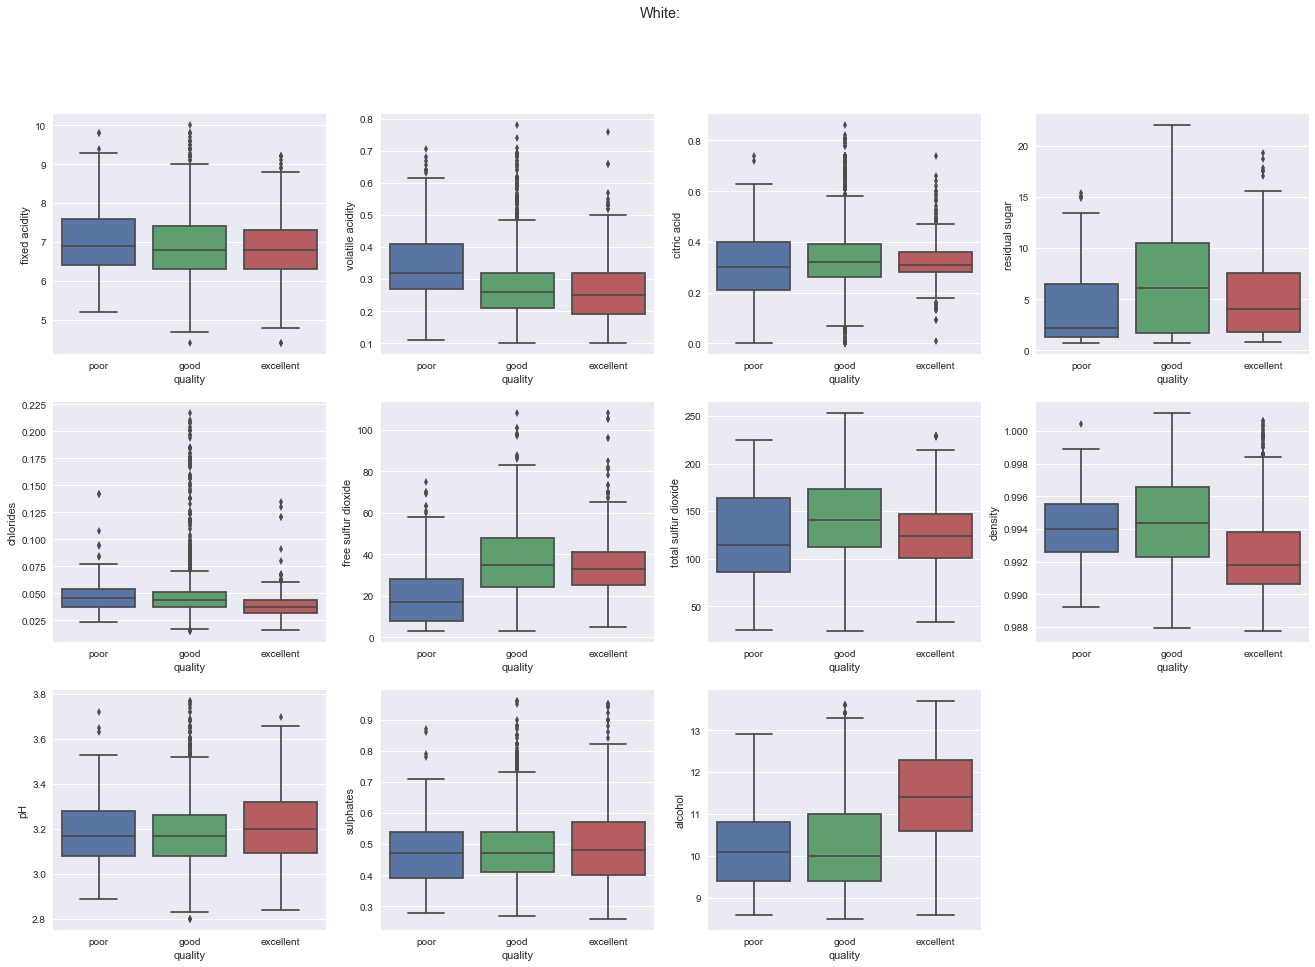

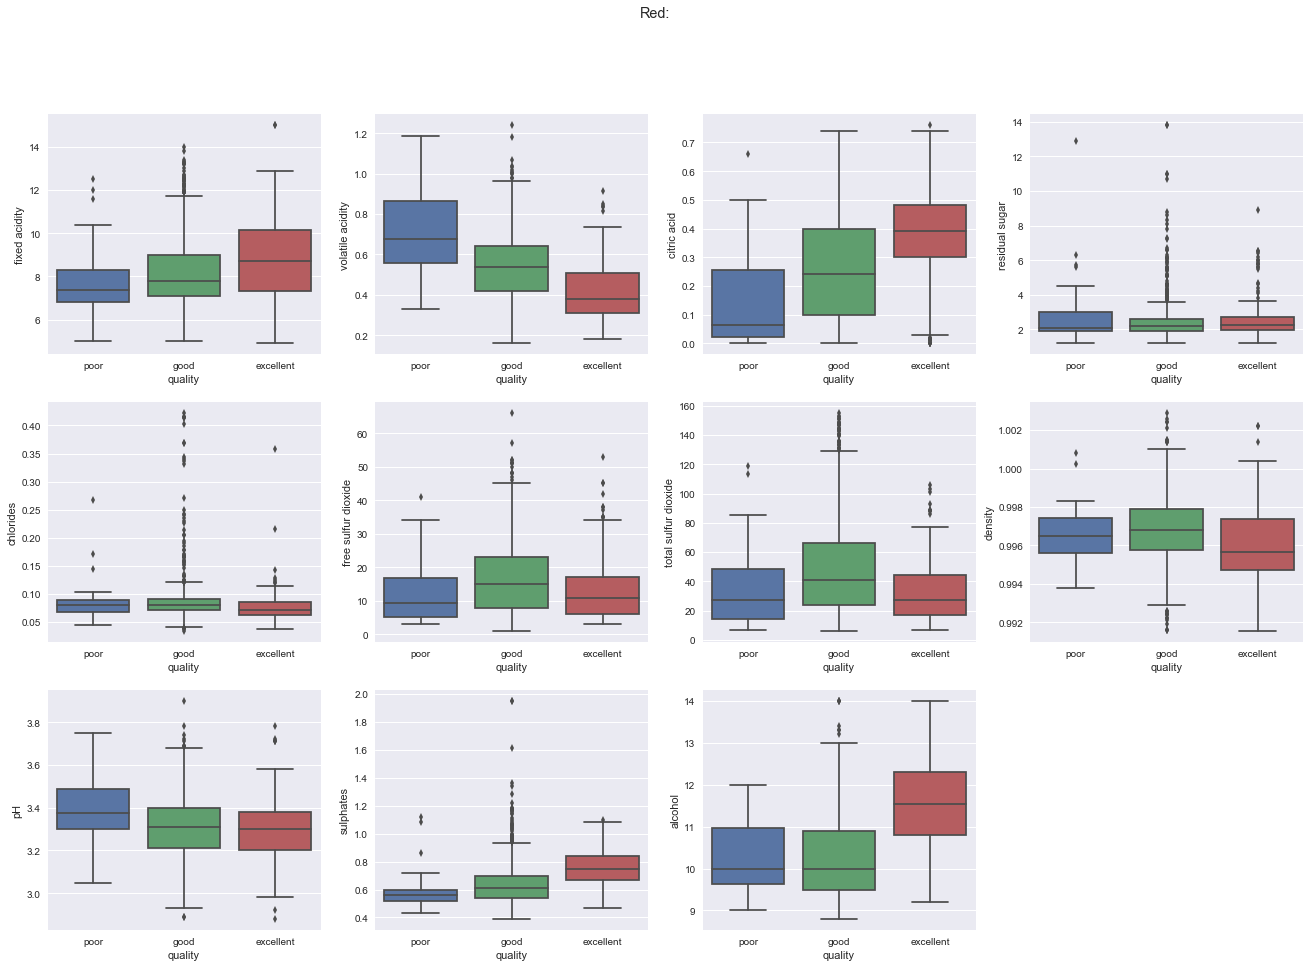

In [9]:
# check physiochemical influence on quality
sns.set()
#change  figure size
mpl.rcParams['figure.figsize'] = (22.5,15)
#check white
whiteBoxplots = plt.suptitle('White:')
for i, col in enumerate(white.columns[:11]):
    whiteBoxplots = plt.subplot(3,4,i+1)
    whiteBoxplots = sns.boxplot(x='quality',y=col, data = white, order = ['poor', 'good', 'excellent'])
plt.show()
# check red
redBoxplots = plt.suptitle('Red:')
for i, col in enumerate(red.columns[:11]):
    redBoxplots = plt.subplot(3,4,i+1)
    redBoxplots = sns.boxplot(x='quality',y=col, data = red, order = ['poor', 'good', 'excellent'])
plt.show()



    The above graphs show that there are differences in spread amoung certain physicochemical properties. The question still remains if these differences are significant however. Inferential statistics will be needed to answer this question accuately.

Investigate importance of combined physiochemical properties using regression and pairplot on the normailized z scores:

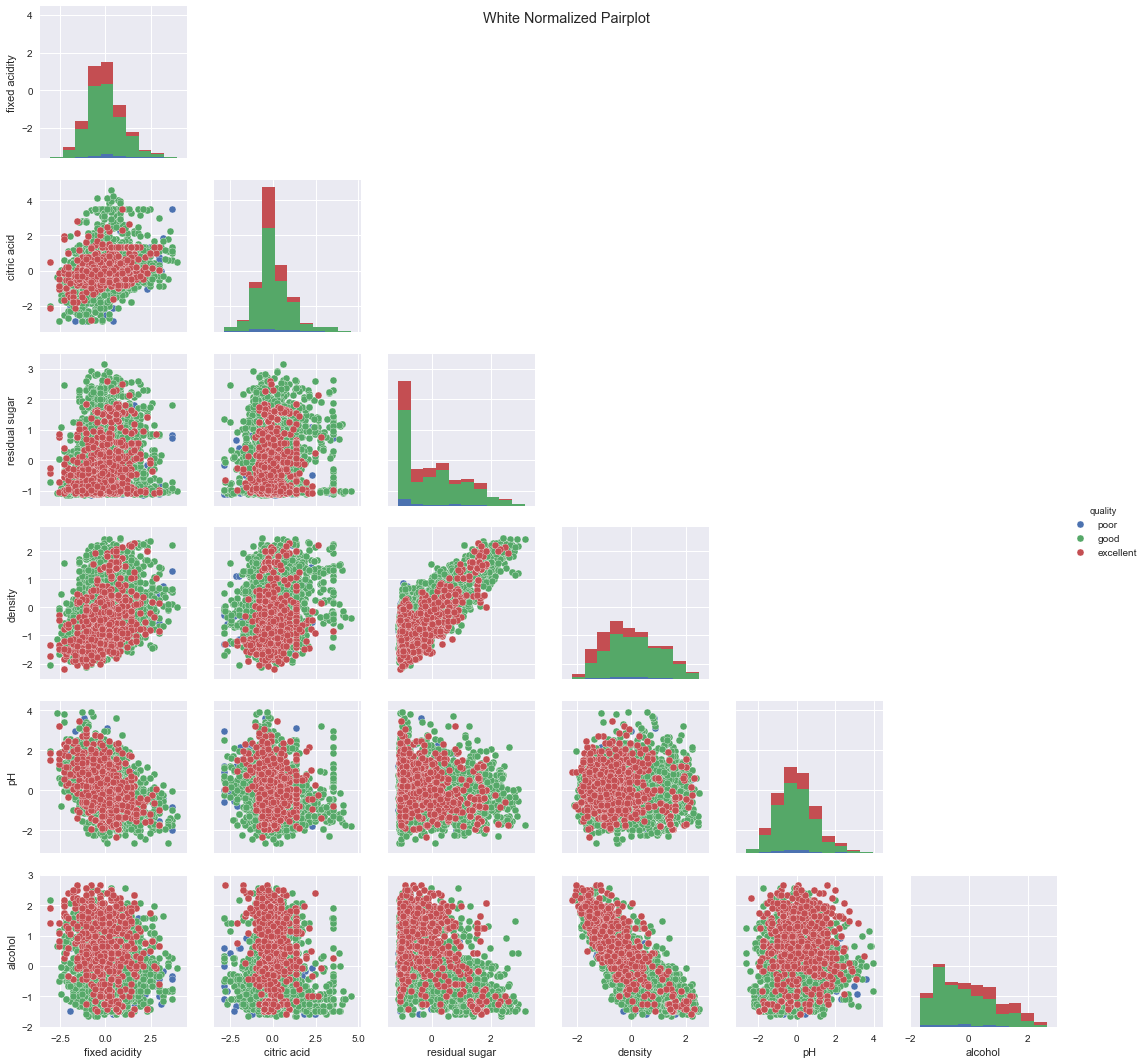

In [10]:
#change  figure size
mpl.rcParams['figure.figsize'] = (15,15)
#create normalized data to plot
cols = list(white.columns)
cols.remove('quality')
whiteNorm = pd.DataFrame()
for col in cols:
    whiteNorm[col] = (white[col] - white[col].mean())/white[col].std(ddof=0)
whiteNorm['quality']  = white['quality']

sns.set()

whitePairplot = sns.pairplot(whiteNorm.sample(frac= 1), hue = 'quality', hue_order =['poor','good', 'excellent'], vars = ['fixed acidity', 'citric acid', 'residual sugar','density', 'pH', 'alcohol'])
for i, j in zip(*np.triu_indices_from(whitePairplot.axes, 1)):
    whitePairplot.axes[i, j].set_visible(False)
plt.suptitle('White Normalized Pairplot')
plt.show()

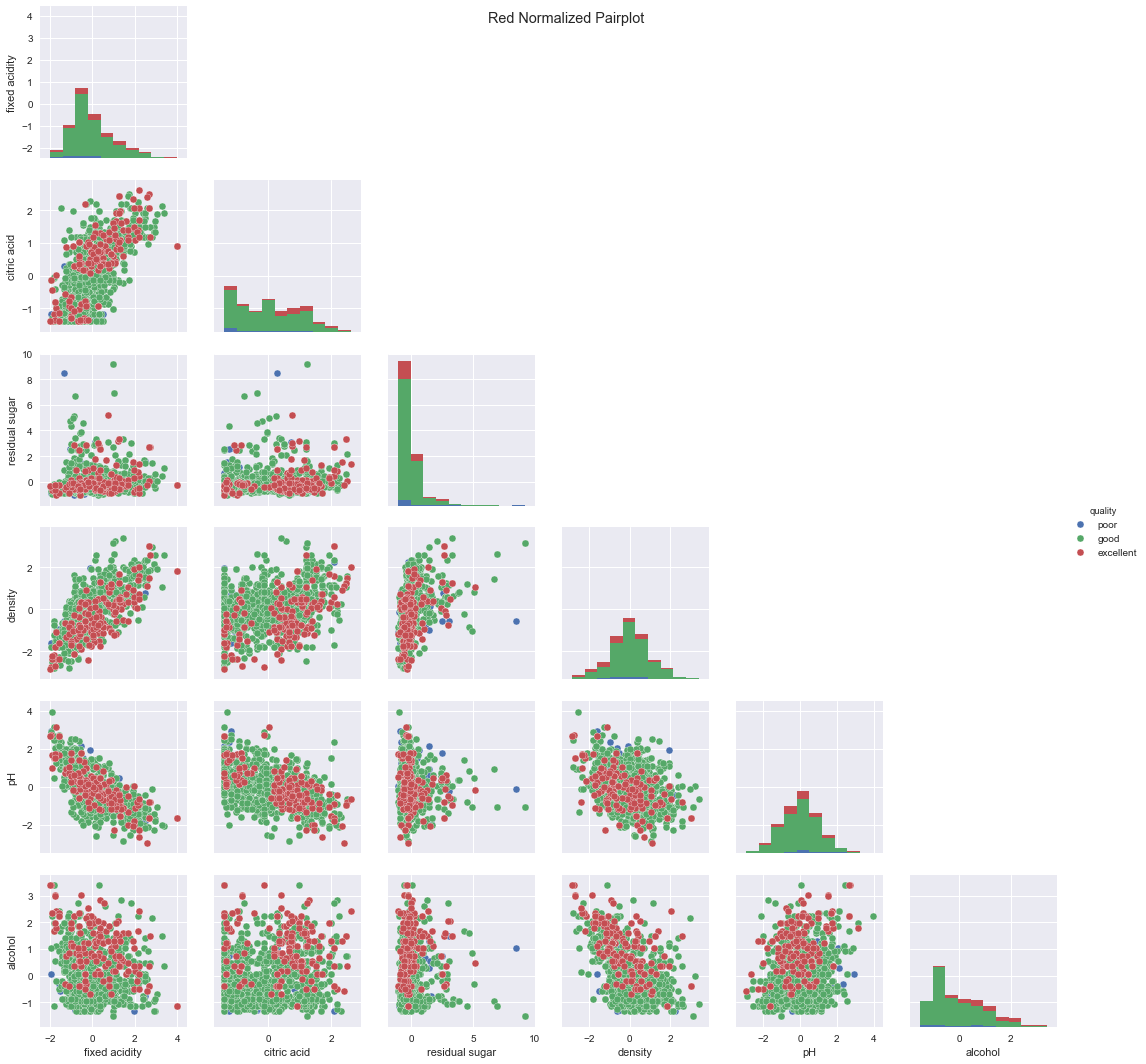

In [11]:
#create normalized data to plot
cols = list(red.columns)
cols.remove('quality')
redNorm = pd.DataFrame()
for col in cols:
    redNorm[col] = (red[col] - red[col].mean())/red[col].std(ddof=0)
redNorm['quality']  = red['quality']
sns.set()
redPairplot = sns.pairplot(redNorm, hue = 'quality', hue_order =['poor','good', 'excellent'], vars = ['fixed acidity', 'citric acid', 'residual sugar','density', 'pH', 'alcohol'])
for i, j in zip(*np.triu_indices_from(redPairplot.axes, 1)):
    redPairplot.axes[i, j].set_visible(False)
plt.suptitle('Red Normalized Pairplot')
plt.show()

    The above pairplots futher show the normalized linear regression between the physicochemical properties and uses color to show which quality the obeservation was. Areas with concentraded red observations show that residual sugar, chlorides, density, and alcohol may be some of the most impactful physicochemical properties on quality. Again inferential statistics will be needed to make definitive answers regarding the influnce these factors have on the output variable quality.
    
## Inferential Statistics

In [12]:
#create white excellent and good dataframes
whiteExce = white[white.quality == 'excellent']
whiteGood = white[white.quality == 'good']
print('White Excellent Observations:',len(whiteExce.quality),', White Good Observations:',len(whiteGood.quality))

#create red excellent and good dataframes
redExce = red[red.quality == 'excellent']
redGood = red[red.quality == 'good']
print('Red Excellent Observations:',len(redExce.quality),', Red Good Observations:',len(redGood.quality))

White Excellent Observations: 774 , White Good Observations: 2673
Red Excellent Observations: 156 , Red Good Observations: 968


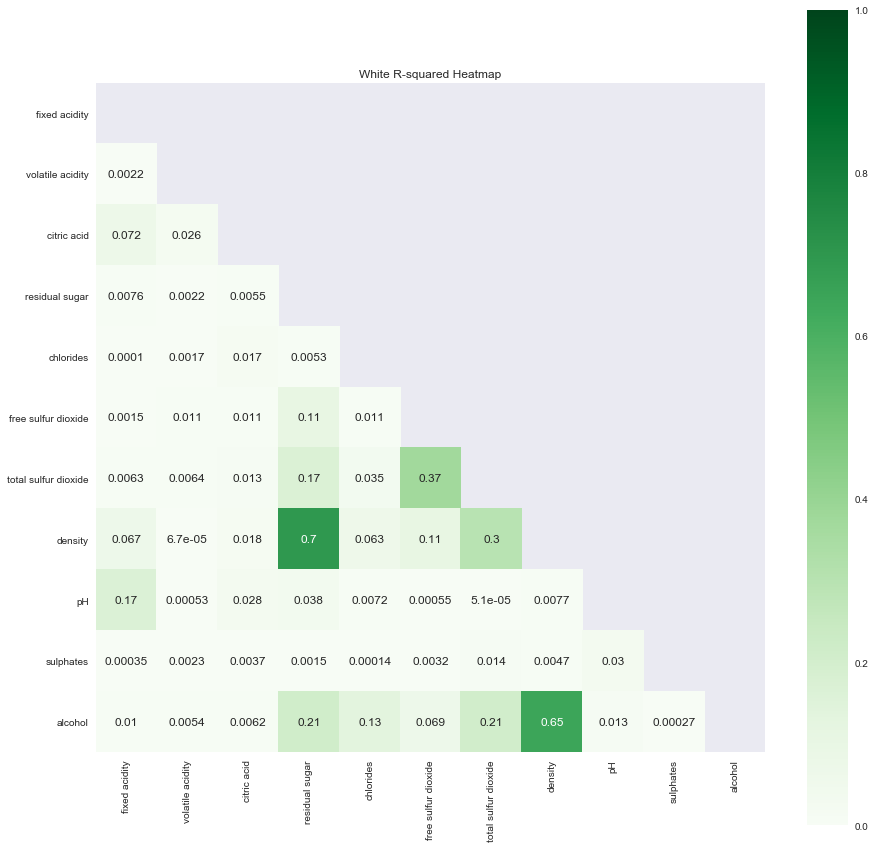

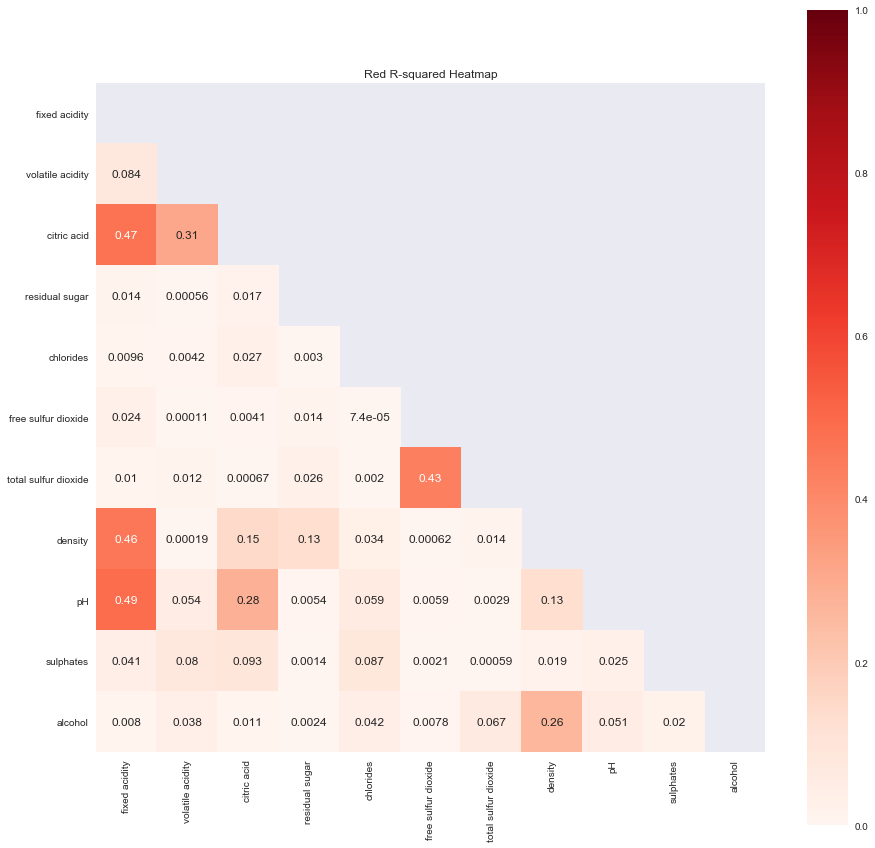

In [13]:
# Generate a mask for the upper triangle
mask = np.zeros_like(white.drop('quality', axis = 1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# show correlation between properties white
whitecorrheatmap =sns.heatmap(white.drop('quality', axis = 1).corr()**2,mask = mask, annot=True, vmin =0, cmap = 'Greens', square =True)
plt.title('White R-squared Heatmap')
plt.show()

# show correlation between properties red
redcorrheatmap = sns.heatmap(red.drop('quality', axis = 1).corr()**2, mask = mask, annot =True, vmin=0, cmap = 'Reds', square =True)
plt.title('Red R-squared Heatmap')
plt.show()


In [14]:
#linear regerssion white
#density-alcohol:
slope, intercept, r_value, p_value, std_err = stats.linregress(white.alcohol, white.density)
print('White Density to Alcohol Linear Regression R-Squared:', r_value**2)
print('Slope: ',slope, ', Intercept: ', intercept)
print()

#density-residual sugar:
slope, intercept, r_value, p_value, std_err = stats.linregress(white['residual sugar'], white.density)
print('White Density to Residual Sugar Linear Regression R-Squared:', r_value**2)
print('Slope: ',slope, ', Intercept: ', intercept)
print()

#linear regerssion red
#pH-fixed acidity:
slope, intercept, r_value, p_value, std_err = stats.linregress(red['fixed acidity'], red.pH)
print('Red pH to Fixed Acidity Regression R-Squared:', r_value**2)
print('Slope: ',slope, ', Intercept: ', intercept)
print()

#fixed acidity-citric acid
slope, intercept, r_value, p_value, std_err = stats.linregress(red['citric acid'], red['fixed acidity'])
print('Red Fixed Acidity to Citric Acid Regression R-Squared:', r_value**2)
print('Slope: ',slope, ', Intercept: ', intercept)
print()




White Density to Alcohol Linear Regression R-Squared: 0.64637974557
Slope:  -0.00190992696734 , Intercept:  1.0140660527

White Density to Residual Sugar Linear Regression R-Squared: 0.698181078251
Slope:  0.000482984780378 , Intercept:  0.99093772939

Red pH to Fixed Acidity Regression R-Squared: 0.491470323439
Slope:  -0.0614497730509 , Intercept:  3.82406622329

Red Fixed Acidity to Citric Acid Regression R-Squared: 0.469329843969
Slope:  6.11496946646 , Intercept:  6.66814017236



In [15]:
#difference of means function
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [16]:
# null hypothesis: excellent wines have the same mean as good wines
alpha = 0.003/22
whiteNull = {}
for i in whiteExce.columns[:11]:
    t, p = sms.weightstats.ztest(whiteExce[i],whiteGood[i],alternative ='two-sided', usevar='pooled')
    if p< alpha:
        whiteNull[i]=t,p,stats.sem(white[i]), smss.CompareMeans(smss.DescrStatsW(whiteExce[i]), smss.DescrStatsW(whiteGood[i])).tconfint_diff(usevar='pooled', alpha =alpha)
    
redNull = {}
for i in redExce.columns[:11]:
    t,p = sms.weightstats.ztest(redExce[i],redGood[i], alternative = 'two-sided', usevar='pooled')
    if p< alpha:
        redNull[i]=t,p,stats.sem(red[i]), smss.CompareMeans(smss.DescrStatsW(redExce[i]), smss.DescrStatsW(redGood[i])).tconfint_diff(usevar='pooled', alpha =alpha)
    



In [17]:
print('White Rejectected Null hypotheses:', list(whiteNull.keys()))
print()
for key in whiteNull.keys():
    t,p,err, conf = whiteNull[key]
    print(key,':')
    print('Z-score:', t)
    print('P value:', p)
    print('Difference of Means:', diff_of_means(whiteExce[key],whiteGood[key]) )
    print('Margin of Error:', err)
    print('Difference Confidence Interval:', conf)
    print()
print()
print('Red Rejectected Null hypotheses:',list(redNull.keys()))
print()
for key in redNull.keys():
    t,p,err, conf = redNull[key]
    print(key,':')
    print('Z-score:', t)
    print('P value:', p)
    print('Difference of Means:', diff_of_means(redExce[key],redGood[key]) )
    print('Margin of Error:', err)
    print('Difference Confidence Interval:', conf)
    print()

White Rejectected Null hypotheses: ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'alcohol']

residual sugar :
Z-score: -6.49493143994
P value: 8.30712331325e-11
Difference of Means: -1.3097658323110641
Margin of Error: 0.0829822563656
Difference Confidence Interval: (-2.0799005433918323, -0.53963112123027313)

chlorides :
Z-score: -10.985236388
P value: 4.50058832096e-28
Difference of Means: -0.008967487101854583
Margin of Error: 0.0003397515761
Difference Confidence Interval: (-0.012085005076635975, -0.0058499691270720959)

total sulfur dioxide :
Z-score: -10.3686667675
P value: 3.44294672837e-25
Difference of Means: -17.082704739035478
Margin of Error: 0.692554867618
Difference Confidence Interval: (-23.374597757253934, -10.790811720817022)

density :
Z-score: -16.2902900456
P value: 1.15679309818e-59
Difference of Means: -0.0018462298262522658
Margin of Error: 4.79661264344e-05
Difference Confidence Interval: (-0.0022790470731526612, -0.0014134125793583098

# Machine Learning


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

dic2 = {'poor':0, 'good':0, 'excellent':1}




# data normalization on test data and apply binary values to ecellent and not excellent
whiteX = whiteNorm.drop('quality', axis = 1)
whiteTestX = whiteTest.drop('quality', axis = 1)
for col in cols:
    whiteTestX[col] = (whiteTestX[col] - whiteTestX[col].mean())/whiteTestX[col].std(ddof=0)


redX = redNorm.drop('quality', axis = 1)
redTestX = redTest.drop('quality', axis = 1)
for col in cols:
    redTestX[col] = (redTestX[col] - redTestX[col].mean())/redTestX[col].std(ddof=0)



white.y = white.quality.replace(dic2)
red.y = red.quality.replace(dic2)
whiteTest.y = whiteTest.quality.replace(dic2)
redTest.y = redTest.quality.replace(dic2)




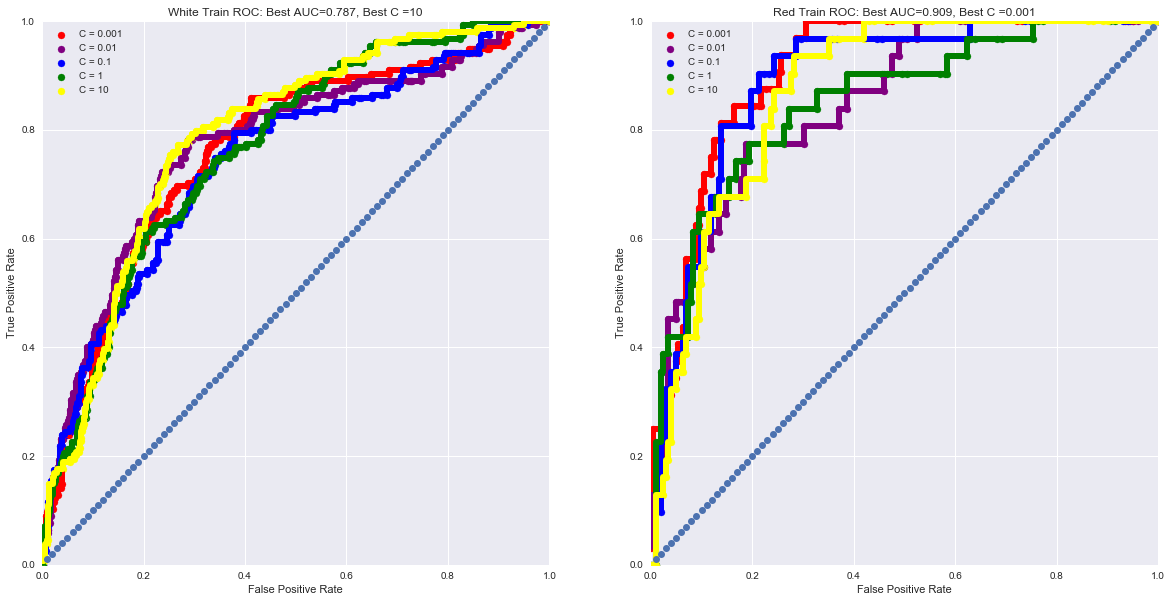

In [19]:
# logistic regression
#cross validation for best c using area under curve (auc) of roc curves
whiteBestC=0
redBestC=0
whiteBestAUCC=0
redBestAUCC=0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.001, 0.01, 0.1, 1,10]
kf = StratifiedKFold(n_splits=5)

# change  figure size
mpl.rcParams['figure.figsize'] = (20,10)
sns.set()
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(whiteX,white.y):
    lr = LogisticRegression(C=Cs[i])
    lr.fit(whiteX.iloc[train.tolist()],white.y.iloc[train.tolist()])
    preds = lr.predict_proba(whiteX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(white.y.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>whiteBestAUCC:
        whiteBestC=Cs[i]
        whiteBestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('White Train ROC: Best AUC='+str(round(whiteBestAUCC,3))+', Best C ='+str(whiteBestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')

i = 0

plt.subplot(1,2,2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
for train, test in kf.split(redX,red.y):
    lr = LogisticRegression(C=Cs[i])
    lr.fit(redX.iloc[train.tolist()],red.y.iloc[train.tolist()])
    preds = lr.predict_proba(redX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(red.y.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>redBestAUCC:
        redBestC=Cs[i]
        redBestAUCC=auc
    i+=1
    plt.scatter(x=fpr, y=tpr, c  = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Red Train ROC: Best AUC='+str(round(redBestAUCC,3))+', Best C ='+str(redBestC))
plt.plot(x,y,'o')
plt.savefig('ROCLogRegTrain.png')
plt.show()



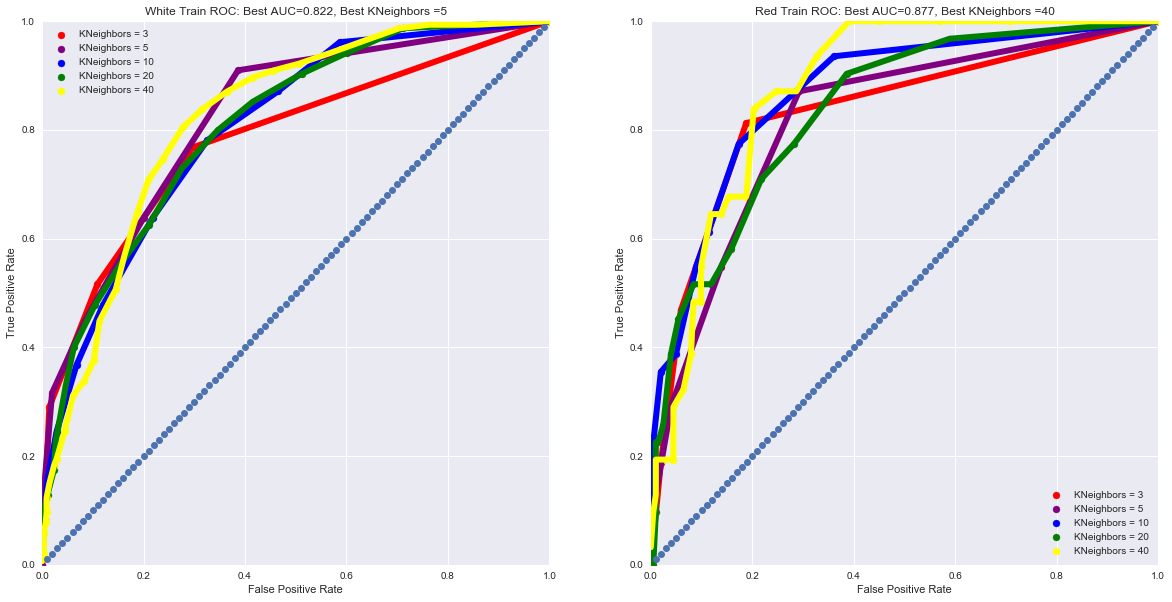

In [20]:
#K nearest neighbor
#cross validation for best c using area under curve (auc) of roc curves
whiteBestK=0
redBestK=0
whiteBestAUCK=0
redBestAUCK=0
i = 0

Ks= [3,5,10,20,40]


sns.set()
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(whiteX,white.y):
    knn = KNeighborsRegressor(Ks[i])
    knn.fit(whiteX.iloc[train.tolist()],white.y.iloc[train.tolist()])
    preds = knn.predict(whiteX.iloc[test.tolist()])
    fpr, tpr, threshold = metrics.roc_curve(white.y.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>whiteBestAUCK:
        whiteBestK=Ks[i]
        whiteBestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='KNeighbors = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth = 6.0)
plt.legend()    
plt.title('White Train ROC: Best AUC='+str(round(whiteBestAUCK,3))+', Best KNeighbors ='+str(whiteBestK))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')

i = 0

plt.subplot(1,2,2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate'),2
plt.ylabel('True Positive Rate')
for train, test in kf.split(redX,red.y):
    knn = KNeighborsRegressor(Ks[i])
    knn.fit(redX.iloc[train.tolist()],red.y.iloc[train.tolist()])
    preds = knn.predict(redX.iloc[test.tolist()])
    fpr, tpr, threshold = metrics.roc_curve(red.y.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>redBestAUCK:
        redBestK=Ks[i]
        redBestAUCK=auc
    i+=1
    plt.scatter(x=fpr, y=tpr, c  = colors[i-1],label='KNeighbors = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth = 6.0)
plt.legend()    
plt.title('Red Train ROC: Best AUC='+str(round(redBestAUCK,3))+', Best KNeighbors ='+str(redBestK))
plt.plot(x,y,'o')
plt.savefig('ROCKNeighborTrain.png')
plt.show()

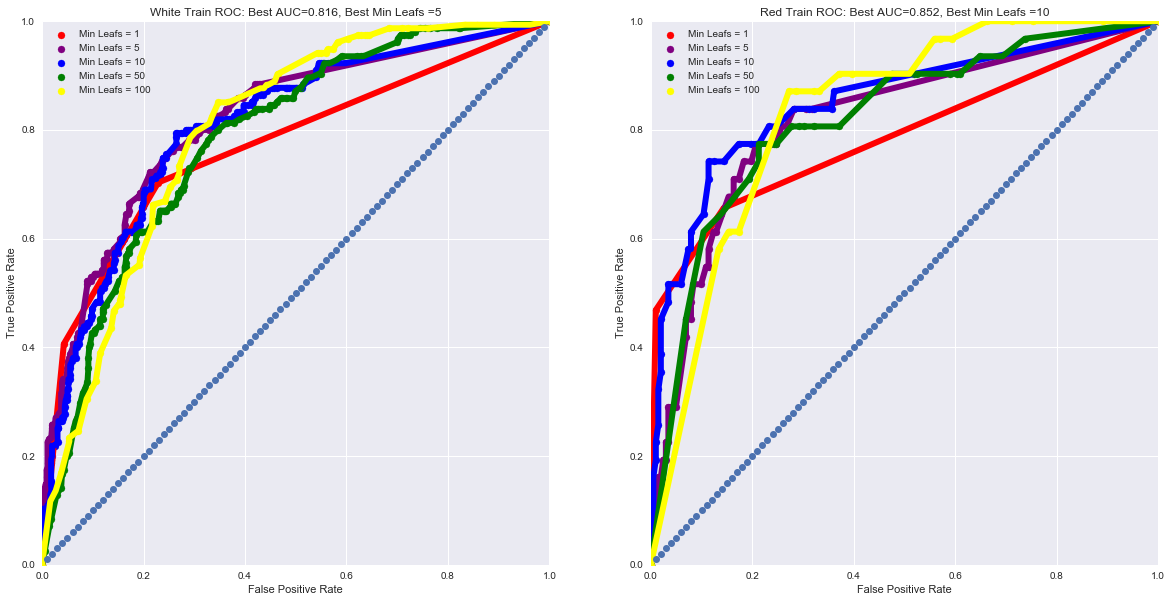

In [21]:
#Random forest regressor neighbor
#cross validation for best c using area under curve (auc) of roc curves
whiteBestL=0
redBestL=0
whiteBestAUCL=0
redBestAUCL=0
i = 0

Ls= [1,5,10,50,100]


sns.set()
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(whiteX,white.y):
    clf = RandomForestRegressor(n_estimators=2,min_samples_leaf=Ls[i], max_features = "auto")
    clf.fit(whiteX.iloc[train.tolist()],white.y.iloc[train.tolist()])
    preds = clf.predict(whiteX.iloc[test.tolist()])
    fpr, tpr, threshold = metrics.roc_curve(white.y.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>whiteBestAUCL:
        whiteBestL=Ls[i]
        whiteBestAUCL=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='Min Leafs = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth = 6.0)
plt.legend()    
plt.title('White Train ROC: Best AUC='+str(round(whiteBestAUCL,3))+', Best Min Leafs ='+str(whiteBestL))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')

i = 0

plt.subplot(1,2,2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate'),2
plt.ylabel('True Positive Rate')
for train, test in kf.split(redX,red.y):
    clf = RandomForestRegressor(n_estimators=2,min_samples_leaf=Ls[i],max_features = "auto")
    clf.fit(redX.iloc[train.tolist()],red.y.iloc[train.tolist()])
    preds = clf.predict(redX.iloc[test.tolist()])
    fpr, tpr, threshold = metrics.roc_curve(red.y.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>redBestAUCL:
        redBestL=Ls[i]
        redBestAUCL=auc
    i+=1
    plt.scatter(x=fpr, y=tpr, c  = colors[i-1],label='Min Leafs = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Red Train ROC: Best AUC='+str(round(redBestAUCL,3))+', Best Min Leafs ='+str(redBestL))
plt.plot(x,y,'o')
plt.savefig('ROCForestTrain.png')
plt.show()

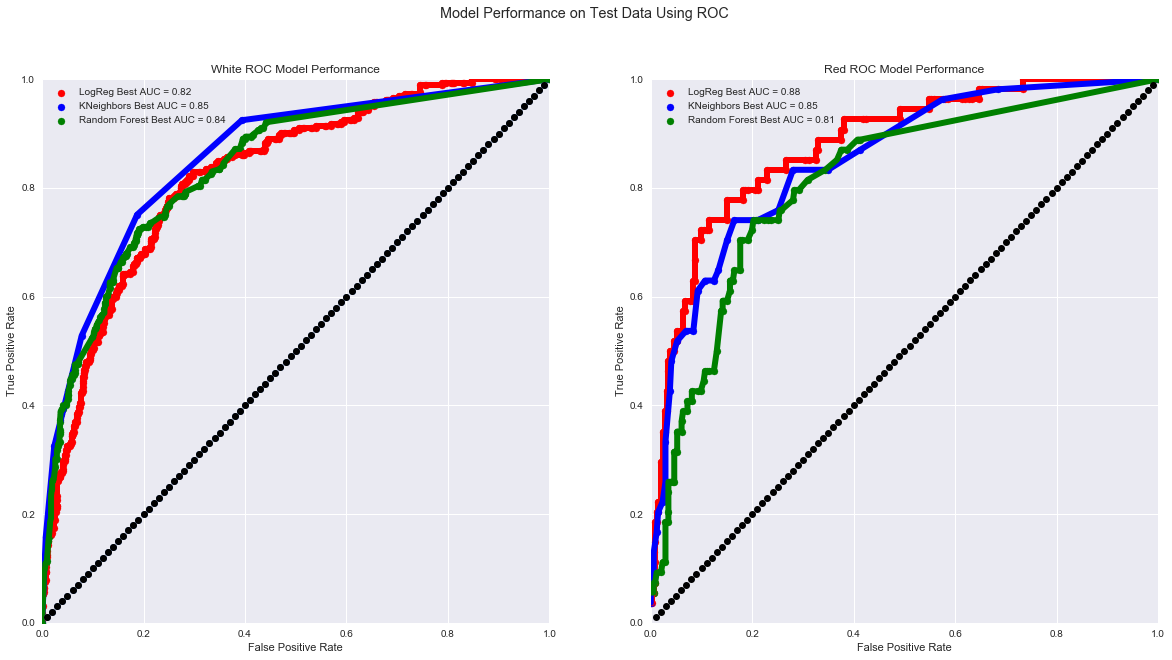

In [22]:
#use best model parameters from cross validation to fit to all to train data and then predict test data using model  and compare thier roc

#white

#logistic regregression best model white
lr = LogisticRegression(C=whiteBestC)
lr.fit(whiteX,white.y)
preds = lr.predict_proba(whiteTestX)[:,1]
fpr, tpr, threshold = metrics.roc_curve(whiteTest.y, preds)    
auc = metrics.auc(fpr,tpr)
# change  figure size
mpl.rcParams['figure.figsize'] = (20,10)
sns.set()
#plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
plt.subplot(1,2,1)
plt.scatter(x=fpr, y=tpr, color = 'Red', label= 'LogReg Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr,color= 'Red',linewidth=6.0)


#knn best model white
knn = KNeighborsRegressor(whiteBestK)
knn.fit(whiteX,white.y)
preds = knn.predict(whiteTestX)
fpr, tpr, threshold = metrics.roc_curve(whiteTest.y, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Blue', label= 'KNeighbors Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr,color= 'Blue',linewidth=6.0)

#random forest best model white
clf = RandomForestRegressor(n_estimators=2,min_samples_leaf =whiteBestL,max_features = "auto")
clf.fit(whiteX,white.y)
preds = clf.predict(whiteTestX)
fpr, tpr, threshold = metrics.roc_curve(whiteTest.y, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Green', label= 'Random Forest Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr,color= 'Green',linewidth=6.0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('White ROC Model Performance')
plt.legend()
plt.plot(x,y,'o')


plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.plot(x,y,'o', color='Black')



#red

#logistic regression best model red
lr = LogisticRegression(C=redBestC)
lr.fit(redX,red.y)
preds = lr.predict_proba(redTestX)[:,1]
fpr, tpr, threshold = metrics.roc_curve(redTest.y, preds)
auc = metrics.auc(fpr,tpr)
plt.subplot(1,2,2)
plt.scatter(x=fpr, y=tpr, color = 'Red', label= 'LogReg Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr, color = 'Red',linewidth=6.0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#knn best model red
knn = KNeighborsRegressor(redBestK)
knn.fit(redX,red.y)
preds = knn.predict(redTestX)
fpr, tpr, threshold = metrics.roc_curve(redTest.y, preds)
auc = metrics.auc(fpr,tpr)
plt.subplot(1,2,2)
plt.scatter(x=fpr, y=tpr, color = 'Blue', label= 'KNeighbors Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr, color = 'Blue',linewidth=6.0)

#random forest best model red
clf = RandomForestRegressor(n_estimators=2,min_samples_leaf =redBestL,max_features = "auto")
clf.fit(redX,red.y)
preds = clf.predict(redTestX)
fpr, tpr, threshold = metrics.roc_curve(redTest.y, preds)
auc = metrics.auc(fpr,tpr)
plt.subplot(1,2,2)
plt.scatter(x=fpr, y=tpr, color = 'Green', label= 'Random Forest Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr, color = 'Green',linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Red ROC Model Performance')
plt.plot(x,y,'o',color='Black')

plt.suptitle(' Model Performance on Test Data Using ROC')
plt.savefig('ROCtest.png')
plt.show()



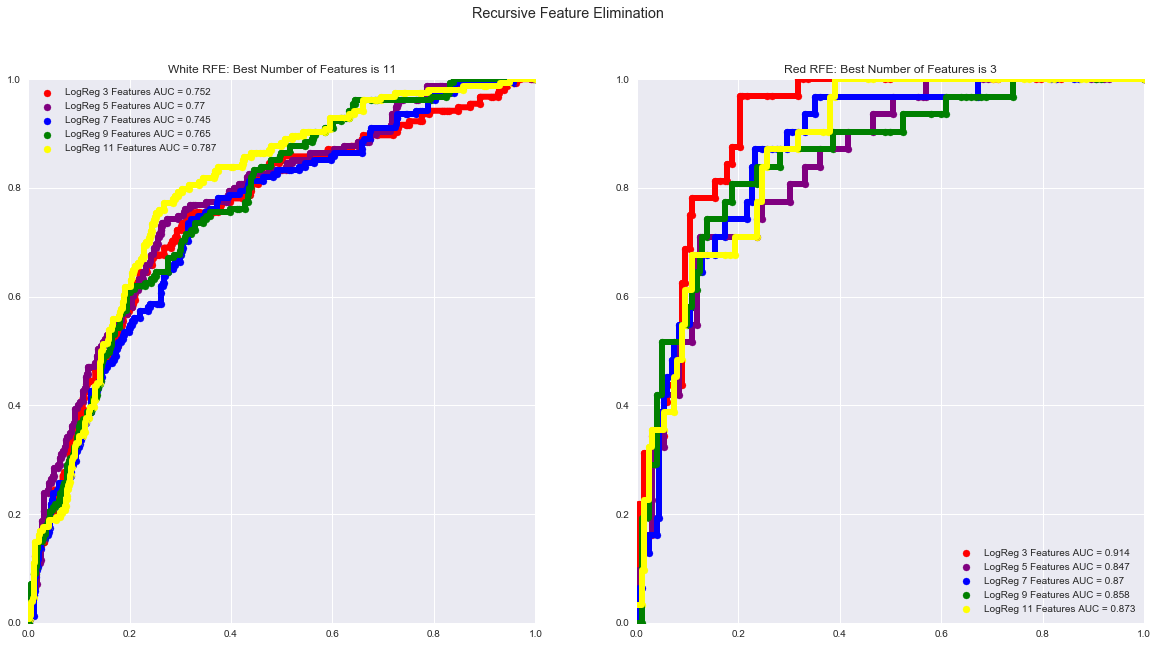

In [23]:
from sklearn.feature_selection import RFE
i=0
whiteBestF =0
whiteBestAUCF =0
whiteBestMask =[]
redBestF =0
redBestAUCF =0
redBestMask = []


Fs = [3,5,7,9,11]

# white
plt.subplot(1,2,1)
for train, test in kf.split(whiteX,white.y):
    model = LogisticRegression(C=whiteBestC)
    # create the RFE model and select 3 attributes
    rfe = RFE(model,Fs[i], step =1)
    rfe = rfe.fit(whiteX.iloc[train.tolist()], white.y.iloc[train.tolist()])
    preds = rfe.predict_proba(whiteX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(white.y.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>whiteBestAUCF:
        whiteBestF=Fs[i]
        whiteBestAUCF=auc
        whiteBestMask = list(whiteX.columns[rfe.support_])
        plt.title('White RFE: Best Number of Features is ' + str(len(whiteBestMask)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'LogReg ' +str(rfe.n_features_)+' Features AUC = '+str(round(auc,3)))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()




# red
i=0
plt.subplot(1,2,2)
for train, test in kf.split(redX,red.y):
    model = LogisticRegression(C=redBestC)
    # create the RFE model and select 3 attributes
    rfe = RFE(model,Fs[i], step =1)
    rfe = rfe.fit(redX.iloc[train.tolist()], red.y.iloc[train.tolist()])
    preds = rfe.predict_proba(redX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(red.y.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>redBestAUCF:
        redBestF=Fs[i]
        redBestAUCF=auc
        redBestMask = list(redX.columns[rfe.support_])
        plt.title('Red RFE: Best Number of Features is ' + str(len(redBestMask)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'LogReg ' +str(rfe.n_features_)+' Features AUC = '+str(round(auc,3)))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.suptitle('Recursive Feature Elimination')
plt.savefig('FeatureRegression.png')
plt.show()



In [24]:

print('Selected Features White Wines: '+str(whiteBestMask))
print('Selected Features Red Wines: '+str(redBestMask))


Selected Features White Wines: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Selected Features Red Wines: ['volatile acidity', 'sulphates', 'alcohol']


# Creating and Saving Desired Plots 

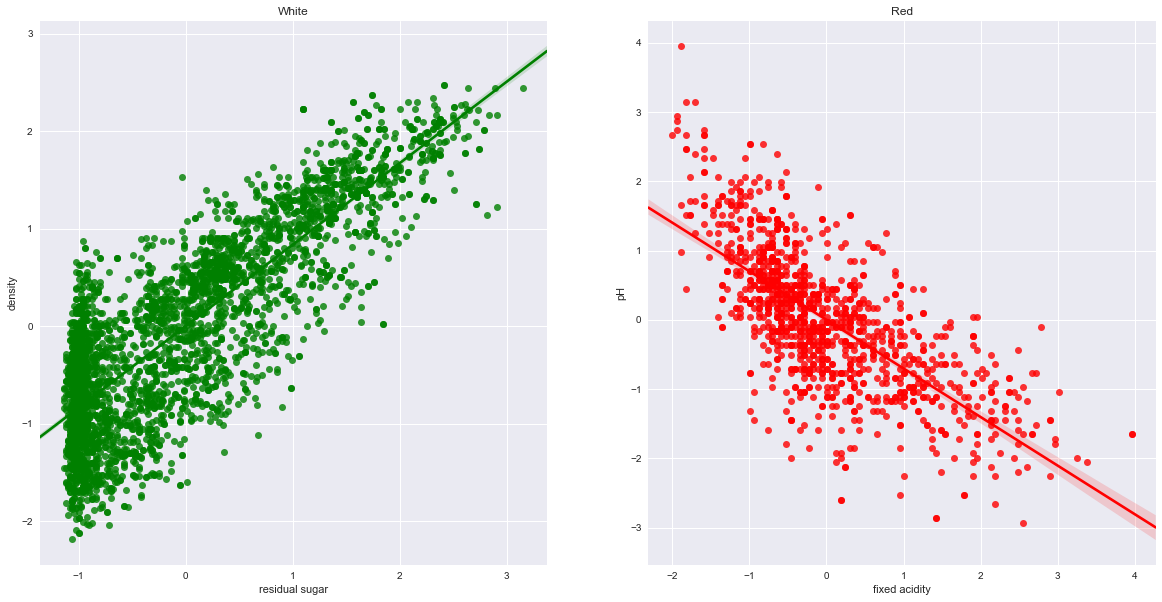

In [25]:

sns.set()
plt.subplot(1,2,1)
sns.regplot('residual sugar','density', data = whiteNorm, color = 'Green')
plt.title('White')

plt.subplot(1,2,2)
sns.regplot('fixed acidity','pH', data = redNorm , color = 'Red')
plt.title('Red')
plt.savefig('Scatter.png')
plt.show()




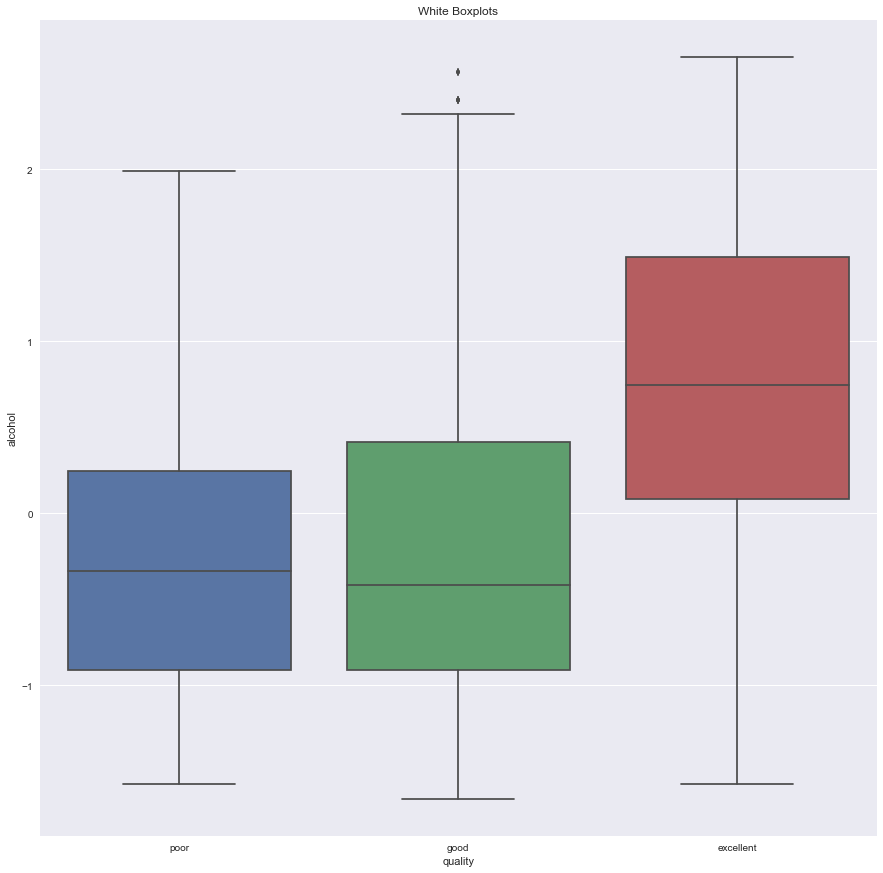

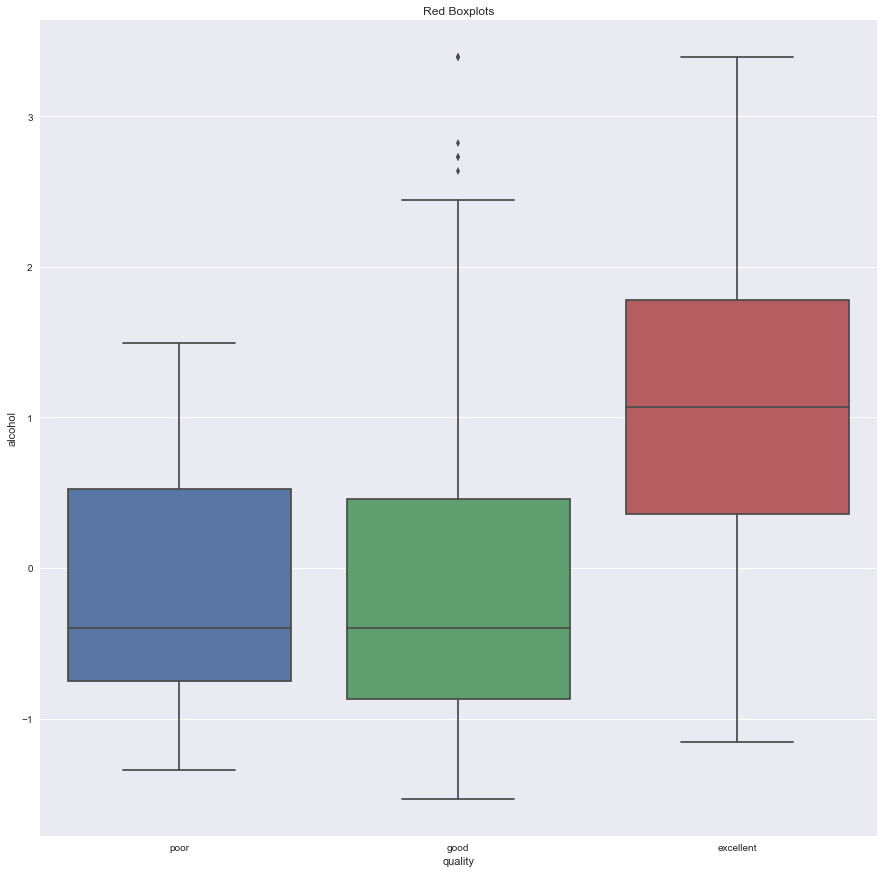

In [26]:
mpl.rcParams['figure.figsize'] = (15,15)
sns.set()
whiteAlc = sns.boxplot(x = 'quality', y = 'alcohol', data=whiteNorm, order = ['poor', 'good', 'excellent'])
plt.title('White Boxplots')
plt.show()

sns.set()
redAlc = sns.boxplot(x = 'quality', y = 'alcohol', data=redNorm, order = ['poor', 'good', 'excellent'])
plt.title('Red Boxplots')
plt.show()
# save dfigures:

fig3 = redAlc.get_figure()
fig3.savefig("RedBox.png")

fig4 = whiteAlc.get_figure()
fig4.savefig("WhiteBox.png")
